# Ensemble Techniques for Diagnosing Parkinson's Disease

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. 
It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. 
There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), 
hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments 
and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the 
patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD,
diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. 
Monitoring progression of the disease over time requires repeated clinic visits by the patient.
An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. 
Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. 
If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an 
effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at -

https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/

The data consists of those diagnosed with Parkinson Disease and those who do not.

Steps to be followed:

Load the data set

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, 
number of attributes, types of attributes and a general idea of likely challenges in the data set. (2.5 points)

Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values,
spread, tails etc. What are your observations? (15 points)

Split the data set into training and test set in the ratio of 70:30 (Training:Test)

Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. (7.5 points)

Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)



Please name your file in the following format - CourseName_ResidencyNumber_ProjectNo_Title.ipynb

 

For Ex - Ensemble Techniques_R4_Project_Parkinson’s Disease.ipynb
Regards,

Program Office

MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency
MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 
measures of variation in fundamental frequency
MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
NHR,HNR - Two measures of ratio of noise to tonal components in the voice
status - Health status of the subject (one) - Parkinson's, (zero) - healthy
RPDE,D2 - Two nonlinear dynamical complexity measures
DFA - Signal fractal scaling exponent
spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

# Load the Dataset

In [1]:
import numpy as np
import pandas as pd
print("Input Data and Shape")
d=pd.read_csv('parkinsons.csv')
print(d.shape)
print(d.head())
print(d.columns)
#eye-ball raw data to get a feel of the data.

Input Data and Shape
(195, 24)
             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE      

# 2.0 Observations: Question 1 Eyeballing the data 
MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz) are the primary features related to frequency
 
The MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP are derived parameters
 
There are 3 primary Freq related parameters, 5 derived parameters for freq 
 
All The 6 Shimmer parameters represent Amplitude variations

Rest of the parameters are extracted features 


In [2]:
df_status=d.groupby(d['status'])
print(" Count of Parkinsons and Non Parkinson's \n",d.groupby(d['status']).count())
status=df_status.describe()
features=status.transpose()
print(features.head(200))

 Count of Parkinsons and Non Parkinson's 
         name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
status                                                                  
0         48           48            48            48              48   
1        147          147           147           147             147   

        MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
status                                                                  ...   
0                     48        48        48          48            48  ...   
1                    147       147       147         147           147  ...   

        MDVP:APQ  Shimmer:DDA  NHR  HNR  RPDE  DFA  spread1  spread2   D2  PPE  
status                                                                          
0             48           48   48   48    48   48       48       48   48   48  
1            147          147  147  147   147  147      147      147  147  147  

[2 rows x 23 columns]


# 3.0 Observations central values & spread. 
The subjects with Parkinson's disease are almost 3 times the non diseased ones
Models ability to predict status 1 will be better than predicting status 0. 

The Table below gives a feel of central tendency and variance for each of the dependent variables 

In most of the cases the means are different but the variances are not equal. Hence classifying the status based on the difference in means alone is not possible and needs more analysis.
   

In [3]:
import seaborn as sns
sns.boxplot(x='status',y='D2',data=d)

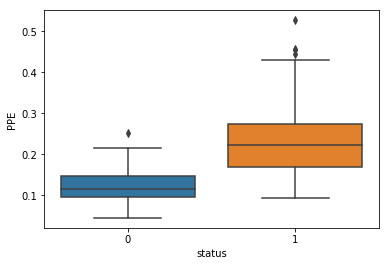

In [4]:
sns.boxplot(x='status',y='PPE',data=d)

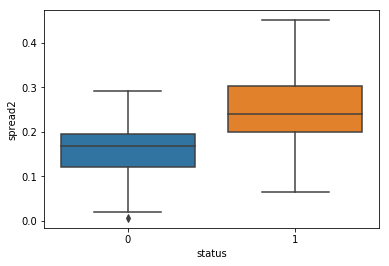

In [5]:
sns.boxplot(x='status',y='spread2',data=d)

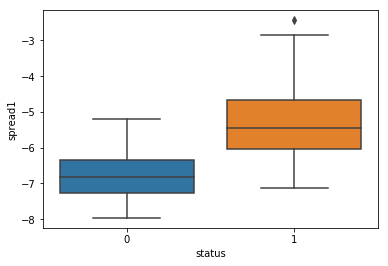

In [6]:
sns.boxplot(x='status',y='spread1',data=d)

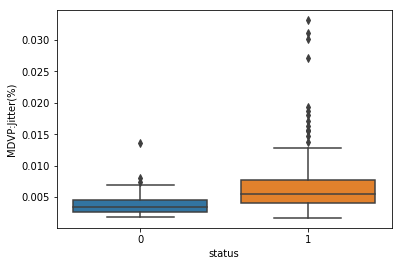

In [7]:
sns.boxplot(x='status',y='MDVP:Jitter(%)',data=d)

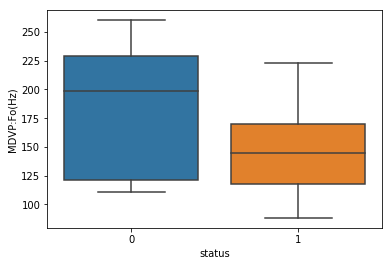

In [8]:
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=d)

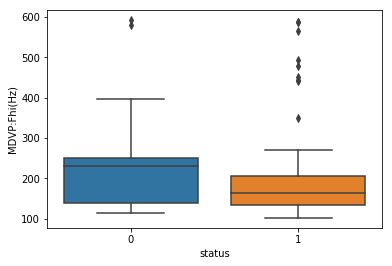

In [9]:
sns.boxplot(x='status',y='MDVP:Fhi(Hz)',data=d)

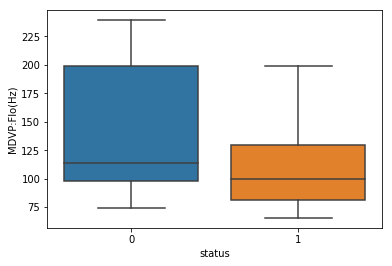

In [10]:
sns.boxplot(x='status',y='MDVP:Flo(Hz)',data=d)

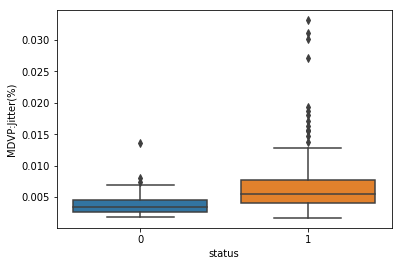

In [11]:
sns.boxplot(x='status',y='MDVP:Jitter(%)',data=d)

# 3.0 Univariate Analysis Observations
The means are different but variances are not equal and hence cannot confirm classification of Parkinsons with Non Parkinsons
There are no outliers for MDVP:Fo(Hz),MDVP:Flo(Hz)
Just the univariate analysis does not give us the Important features.
It will be good to fit a model, list the important features and do a pair plot by dropping all the unimportant features.

# 4.0 Splitting the data into Train and Test (70:30)

In [12]:
from sklearn.model_selection import train_test_split
X_F = d.drop(['name','status'], axis=1) 
y_F = d["status"]
X =  X_F.to_numpy()
y =  y_F.to_numpy()
print(X.shape,y.shape)
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

(195, 22) (195,)


# 5.0 Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy',random_state=7 )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=7,
            splitter='best')

# 6.0 Test the model on test data. What is the accuracy achieved. Capture the predicted values and do a cross-tab.

In [14]:
from sklearn import metrics
print("Score on the Test Set for single Decision Tree is \n",dt_model.score(X_test , y_test))
print("Score on the Train dataset for Single Decision Tree  is \n",dt_model.score(X_train,y_train))
y_predict = dt_model.predict(X_test)
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_F.columns))
print("Confusion Matrix \n",metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

Score on the Test Set for single Decision Tree is 
 0.8813559322033898
Score on the Train dataset for Single Decision Tree  is 
 1.0
                       Imp
MDVP:Fo(Hz)       0.122080
MDVP:Fhi(Hz)      0.000000
MDVP:Flo(Hz)      0.038349
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.031833
MDVP:Shimmer(dB)  0.088092
Shimmer:APQ3      0.000000
Shimmer:APQ5      0.146941
MDVP:APQ          0.000000
Shimmer:DDA       0.000000
NHR               0.000000
HNR               0.000000
RPDE              0.101159
DFA               0.000000
spread1           0.000000
spread2           0.000000
D2                0.000000
PPE               0.471545
Confusion Matrix 
 [[ 9  3]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.93      0.91      0.92        47

   micro avg       0.88      0.88      0.88 

# Capturing the Predicted values

In [15]:
y_predict

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [16]:
y_test

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [17]:
pd.crosstab(y_test, y_predict,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,9,3
1,4,43


In [18]:
test_y = pd.DataFrame(y_test, columns = ["Actual"])
predict_y = pd.DataFrame( y_predict, columns = ["Predicted"])
print(pd.concat([test_y, predict_y], axis=1))

    Actual  Predicted
0        0          1
1        1          0
2        1          1
3        1          1
4        1          1
5        1          1
6        1          0
7        1          1
8        1          1
9        1          1
10       0          0
11       1          1
12       1          1
13       0          1
14       1          1
15       1          1
16       1          1
17       0          0
18       0          0
19       1          1
20       1          1
21       1          1
22       1          1
23       1          1
24       1          1
25       1          1
26       0          0
27       1          1
28       1          1
29       1          1
30       1          1
31       1          1
32       1          1
33       1          1
34       0          1
35       1          1
36       1          1
37       1          1
38       1          1
39       1          0
40       1          1
41       1          1
42       0          0
43       1          1
44       0

# Conclusion
The Accuracy achieved is 0.88 on the test set. Acurracy on the training set is 1.0.
Scores of all the features based on importance is also printed. A scoreof 0.0 for various variables above tells us that they are not important features for the classification of the Parkinsons disease.

However RandomForest classifier with all the features will be used first to obtain the scores.
The classification scores for the testset with the decision tree classifier is .88. 

# 7.0 Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=21,criterion='entropy',max_depth=10,min_samples_leaf=2,max_features='auto',bootstrap=True,random_state=7)
#rfcl = RandomForestClassifier(n_estimators = 5,random_state=7,max_depth=10,min_samples_leaf=1,min_samples_split=2)
rfcl = rfcl.fit(X_train, y_train)
print(rfcl.score(X_test , y_test))
y_random_forest_predict = rfcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_random_forest_predict))

0.9830508474576272
[[11  1]
 [ 0 47]]


In [20]:
test_y = pd.DataFrame(y_test, columns = ["Actual"])
predict_y = pd.DataFrame( y_random_forest_predict, columns = ["Predicted"])
print(pd.concat([test_y, predict_y], axis=1))

    Actual  Predicted
0        0          1
1        1          1
2        1          1
3        1          1
4        1          1
5        1          1
6        1          0
7        1          1
8        1          1
9        1          1
10       0          0
11       1          1
12       1          1
13       0          0
14       1          1
15       1          1
16       1          1
17       0          0
18       0          0
19       1          1
20       1          1
21       1          1
22       1          1
23       1          1
24       1          1
25       1          1
26       0          0
27       1          1
28       1          1
29       1          1
30       1          1
31       1          1
32       1          1
33       1          1
34       0          1
35       1          1
36       1          1
37       1          1
38       1          1
39       1          1
40       1          1
41       1          1
42       0          0
43       1          1
44       0

# Conclusions
Regularization helps in keeping the parameters regular or Normal.

Not too much weight for any feature.

Zero weight for unimportant features.

With Regularization there is remarkable improvement in model accuracy.

One interesting observation is that the scores for each run with the Random Forest are changing even though a random state is specified.

The following features do not contribute much for parkinson's classification/diagnosis. They all have a score of 0.0 when the important features are computed.

MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%),
MDVP:Jitter(Abs),
MDVP:RAP,
MDVP:PPQ,
Jitter:DDP     
MDVP:Shimmer  
Shimmer:DDA      
NHR              
HNR              
spread2          
D2 

Accuracy Scores with all the above features are varying with max_depth and number of Decision Trees. 

The optimum value of max_depth is 10 and the maximum test score of .98 is for 21 decision trees.

However if we drop the above features there are better chances of good prediction accuracy.

C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shivak\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


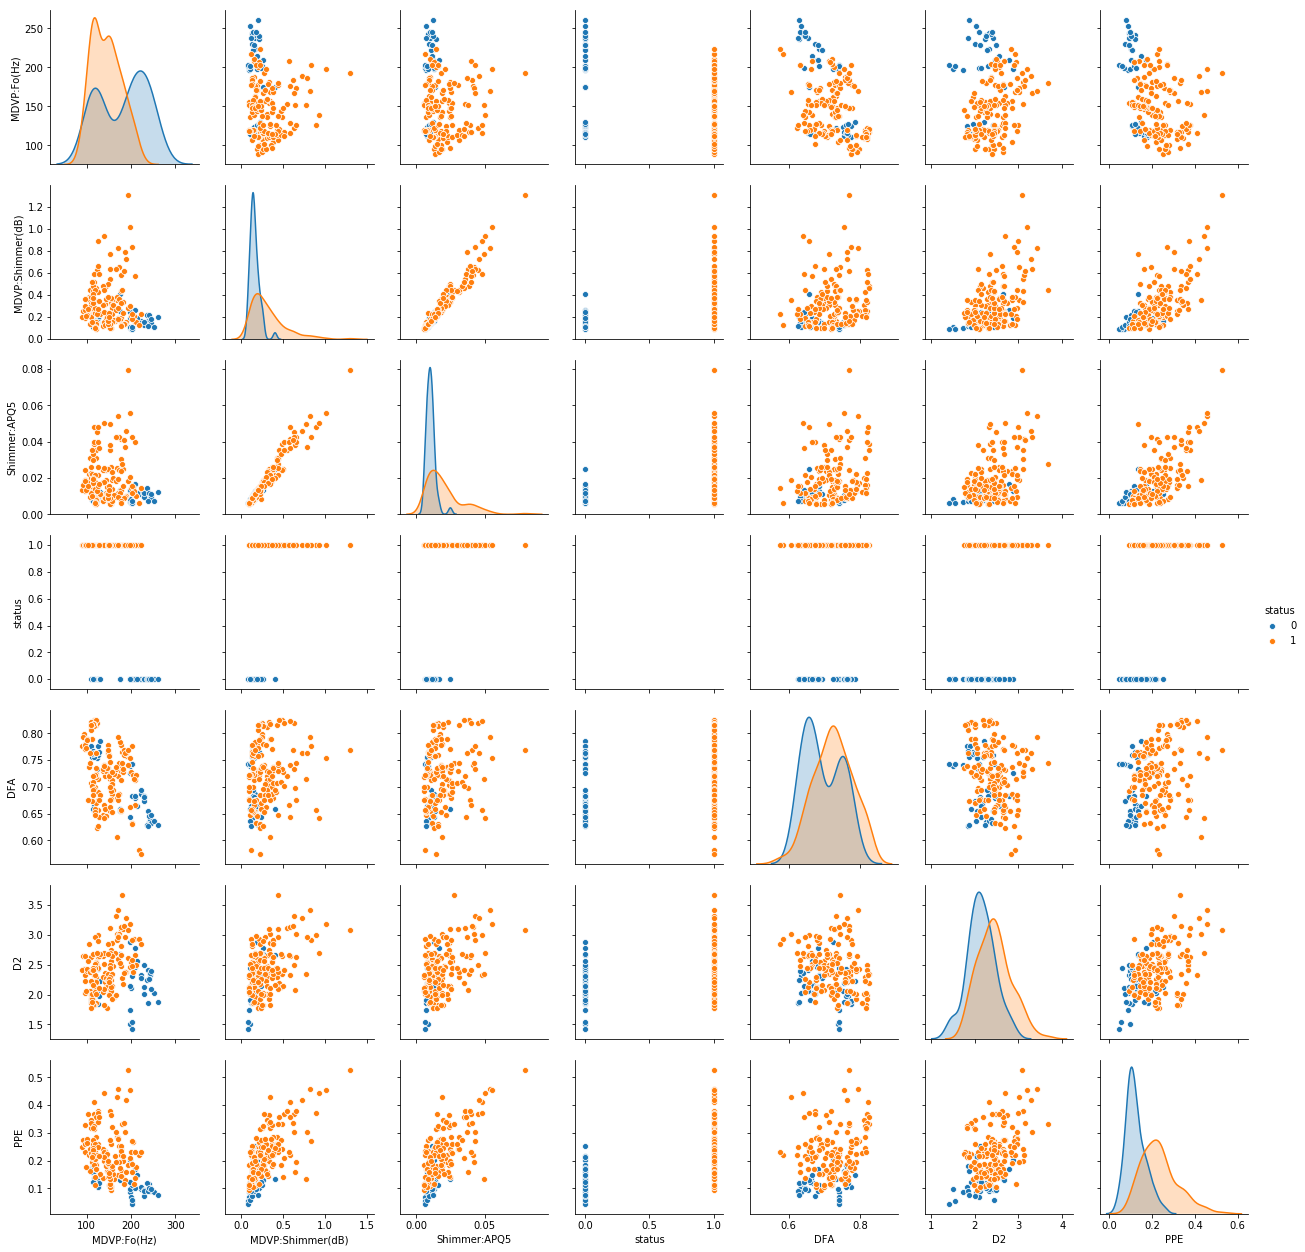

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
df_Imp_features=d.loc[:, d.columns.intersection(['status','MDVP:Fo(Hz)','MDVP:Shimmer(dB)','Shimmer:APQ5','DFA','D2','PPE'])]
sns.pairplot(df_Imp_features,hue='status')

# Conclusions from the Pair Plot
Looking at the pairplot , it is clear that the clusters of Parkinson and Non Parkinson are not completely isolated. The orange and blue dots are mixed up. 

The distributions are also overlapping status cannot  be classified with anyone of these variables. A combination of these variables will enable us to classify the blue dots from orange dots.

The blue dots represent Non Parkinsons while the orange represent subjects with Parkinson's disease.

The next step would be Re-running the Decision Tree model after dropping most of the unimportant features. 

In [22]:
df_Imp_features=d.loc[:, d.columns.intersection(['status','MDVP:Fo(Hz)','MDVP:Shimmer(dB)','Shimmer:APQ5','DFA','D2','PPE'])]
array=df_Imp_features.values
X = array
#print(X)
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
from sklearn import metrics
print("Score on the Test Set for single Decision Tree is \n",dt_model.score(X_test , y_test))
print("Score on the Train dataset for Single Decision Tree  is \n",dt_model.score(X_train,y_train))

Score on the Test Set for single Decision Tree is 
 1.0
Score on the Train dataset for Single Decision Tree  is 
 1.0


# Conclusion
Just one decision tree is enough for this classification. When all the unimportant features are dropped. There is no need for a RandomForest Classifier when the features are dropped.
Parkinsons and Nonparkinsons subject can be classified with 100% accuracy.